# IMPORTS

In [45]:
# ================================================================
# 📦 NOTEBOOK SETUP — Proyecto: 01-toolkit-analisis-bursatil
# ---------------------------------------------------------------
# Esta celda prepara el entorno del notebook para que:
#  1️⃣ Recargue automáticamente los módulos .py al guardarlos.
#  2️⃣ Añada la carpeta src/ al sys.path para que se puedan importar los módulos.
#  3️⃣ Tenga imports base listos para análisis.
# ================================================================

# --- Autoreload ---
%load_ext autoreload
%autoreload 2

# --- Paths del proyecto ---
import os, sys
project_root = os.path.abspath("..")       # ruta base del proyecto (un nivel arriba de notebooks/)
src_path = os.path.join(project_root, "src")

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"✅ src añadido al sys.path: {src_path}")

# --- Imports base ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# --- Imports del proyecto ---
from src.toolkit_bursatil.core.price_series import PriceSeries

print("✅ Entorno listo. Autoreload activo y módulos disponibles.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Entorno listo. Autoreload activo y módulos disponibles.


# YFINANCE

In [37]:
df = yf.download("AAPL", start="2023-01-01", end="2024-12-31")

C:\Users\diego\AppData\Local\Temp\ipykernel_38244\1920030322.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [38]:
print("Tipo de columnas:", type(df.columns))
print("Número de niveles:", getattr(df.columns, 'nlevels', 1))
print("Columnas completas:")
print(df.columns)

Tipo de columnas: <class 'pandas.core.indexes.multi.MultiIndex'>
Número de niveles: 2
Columnas completas:
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [42]:
serie = PriceSeries(ticker="AAPL", data=df)

═════════════════════════════════════════════
 Ticker: AAPL
 Fechas: 2023-01-03 → 2024-12-30
 Media diaria: 0.001515
 Desv. típica diaria: 0.013460
═════════════════════════════════════════════


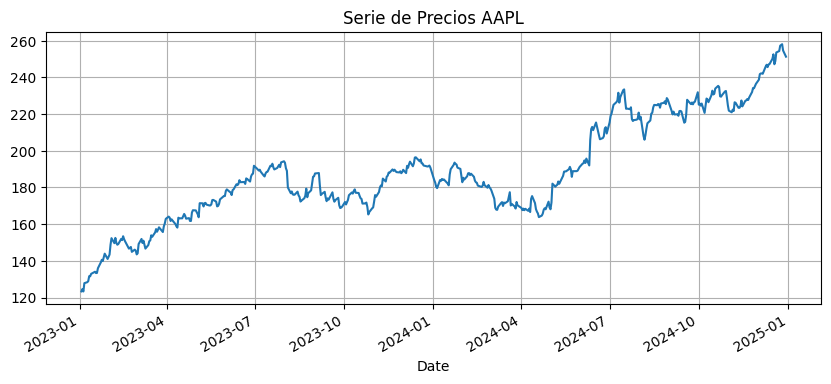

In [46]:
serie.info()
serie.plots_report(column="close", title="Serie de Precios AAPL")


<Axes: title={'center': 'Retornos AAPL'}, xlabel='Date'>

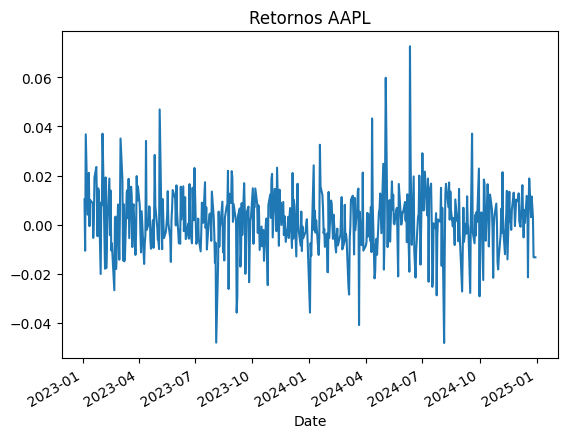

In [47]:
serie.returns().plot(title="Retornos AAPL")

# ALPHA VANTAGE